In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import cv2
import imghdr

In [14]:
data_dir = '/content/drive/MyDrive/data'
img_ext = ['jpeg', 'jpg', 'png']

In [15]:
os.listdir(data_dir)

['cat', 'dog']

In [16]:
for img_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, img)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_ext:
                print('Image not in ext list{}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with image {}'.format(img_path))

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()

Found 6019 files belonging to 2 classes.


In [9]:
# print(batch[1])

# fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

In [18]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.92156863, 0.98039216, 0.9607843 ],
          [0.92156863, 0.98039216, 0.9607843 ],
          [0.92156863, 0.98039216, 0.9607843 ],
          ...,
          [0.08131128, 0.12588848, 0.12712929],
          [0.0830576 , 0.13494179, 0.13011642],
          [0.07843138, 0.13725491, 0.1254902 ]],
 
         [[0.92156863, 0.98039216, 0.9607843 ],
          [0.92156863, 0.98039216, 0.9607843 ],
          [0.92156863, 0.98039216, 0.9607843 ],
          ...,
          [0.05696854, 0.12196182, 0.15245685],
          [0.07219932, 0.14215118, 0.17229955],
          [0.07519914, 0.15018383, 0.17720588]],
 
         [[0.92156863, 0.98039216, 0.9607843 ],
          [0.92156863, 0.98039216, 0.9607843 ],
          [0.92156863, 0.98039216, 0.9607843 ],
          ...,
          [0.15026096, 0.2565304 , 0.3406815 ],
          [0.17688054, 0.2867304 , 0.3804301 ],
          [0.17987132, 0.29434744, 0.39064032]],
 
         ...,
 
         [[0.23184742, 0.40047488, 0.56632966],
          [0.22231

In [19]:
print(len(data))

train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

print(train_size, val_size, test_size)

189
132 38 19


In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (2,2), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

# Second layer
model.add(Conv2D(32, (2,2), 1, activation = 'relu'))
model.add(MaxPooling2D())

# Thrid layer
model.add(Conv2D(64, (2,2), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dropout(0.75))

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 32)      4128      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 62, 62, 64)        8256      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 64)       

In [33]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
132/132 [==============================] - 37s 272ms/step - loss: 0.7147 - accuracy: 0.5644 - val_loss: 0.6326 - val_accuracy: 0.6595
Epoch 2/20
132/132 [==============================] - 33s 249ms/step - loss: 0.6049 - accuracy: 0.6780 - val_loss: 0.6840 - val_accuracy: 0.6250
Epoch 3/20
132/132 [==============================] - 33s 250ms/step - loss: 0.5597 - accuracy: 0.7183 - val_loss: 0.5472 - val_accuracy: 0.7130
Epoch 4/20
132/132 [==============================] - 34s 257ms/step - loss: 0.5175 - accuracy: 0.7403 - val_loss: 0.5108 - val_accuracy: 0.7541
Epoch 5/20
132/132 [==============================] - 36s 267ms/step - loss: 0.4712 - accuracy: 0.7777 - val_loss: 0.4982 - val_accuracy: 0.7467
Epoch 6/20
132/132 [==============================] - 34s 255ms/step - loss: 0.4361 - accuracy: 0.7997 - val_loss: 0.5000 - val_accuracy: 0.7771
Epoch 7/20
132/132 [==============================] - 35s 260ms/step - loss: 0.3920 - accuracy: 0.8116 - val_loss: 0.4958 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

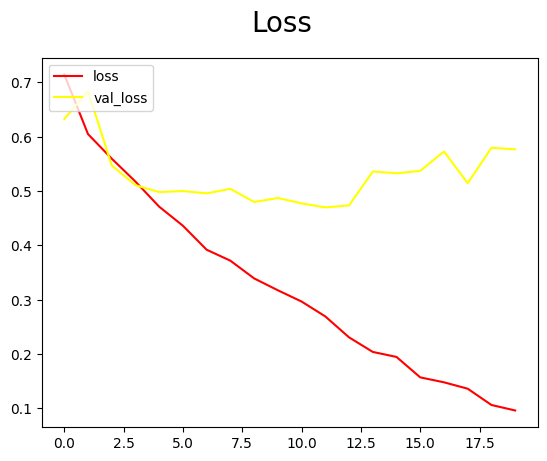

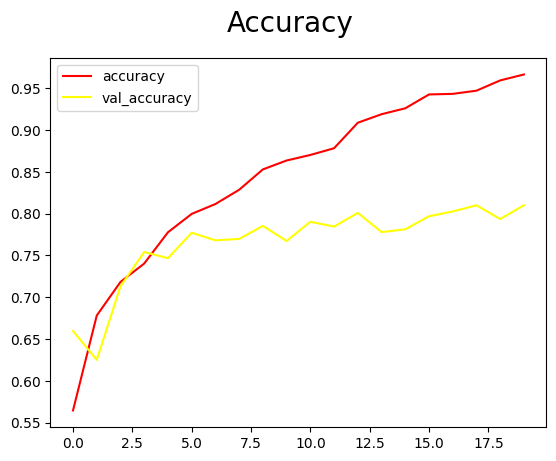

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'yellow', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show

fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'yellow', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 236ms/step


In [37]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.7368420958518982, Recall: 0.8175182342529297, Accuracy: 0.7754749655723572


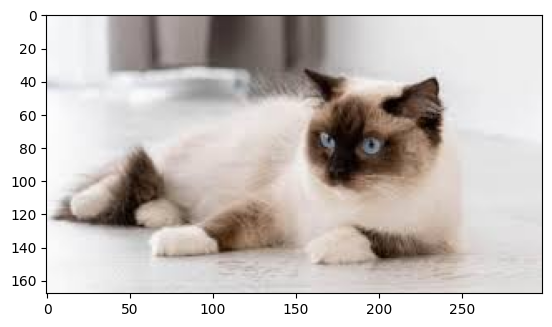

In [38]:
img = cv2.imread('/content/drive/MyDrive/test/cat.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

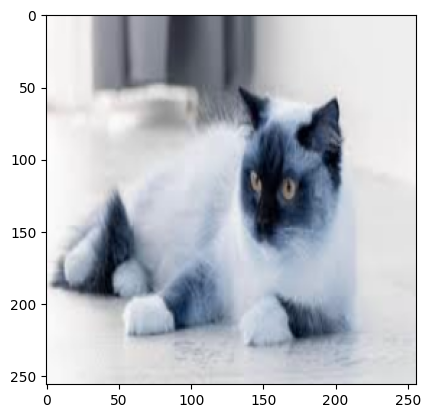

In [39]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 203ms/step


array([[0.24913983]], dtype=float32)

In [41]:
if yhat > 0.5:
    print("Predicted class is Dog")
else:
    print("Predicetd class is Cat")

Predicetd class is Cat


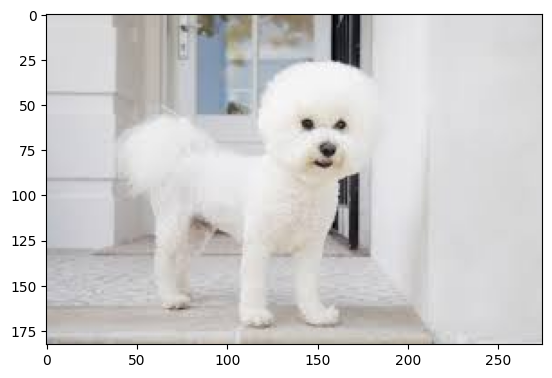

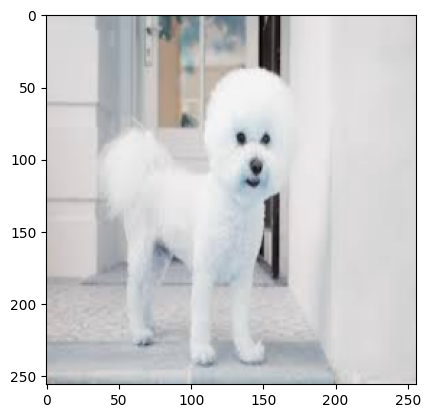

In [42]:
img1 = cv2.imread('/content/drive/MyDrive/test/dog.jpeg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

resize1 = tf.image.resize(img1, (256, 256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize1/255, 0))
yhat

1/1 [==============================] - 0s 19ms/step


array([[0.6569376]], dtype=float32)

In [44]:
if yhat > 0.5:
    print("Predicted class is Dog")
else:
    print("Predicetd class is Cat")

Predicted class is Dog
